In [133]:
#Importing Dataset

import pandas as pd
import numpy as np

import statsmodels.api as sm


In [173]:
from scipy.stats import describe
pd.options.display.max_columns = 12
pd.options.display.max_rows = 24

# disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')

# plots inisde jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='darkgrid', palette='muted')
color_scheme = {
    'red': '#F1637A',
    'green': '#6ABB3E',
    'blue': '#3D8DEA',
    'black': '#000000'
}

import datetime as dt
import sklearn.linear_model as lm

In [104]:
#Sales Data
sale_df = pd.read_excel("E:/PepperFry/Case Data 0322.xlsx", sheet_name = "Sale", header=1)
sale_df.head(3)

,New SKU,Brand,Upstream Contact,Type,Location,W1,W2,W3,W4,W5,...,W1.1,W2.1,W3.1,W4.1,W5.1,W6.1,W7.1,W8.1,W9.1,W10.1
0,GN1063121-Z-WH2203,Woodsworth,Saffron Art & Craft,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GN1063121-Z-WH2305,Woodsworth,Suncity Handicrafts Pvt Ltd,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GN1576961-Z-WH19706,Mudramark,WOODENMOOD,HB-SW,Mumbai,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Import Inventory Data
Inv_df = pd.read_excel("E:/PepperFry/Case Data 0322.xlsx", sheet_name = "Inventory", header=3)
Inv_df.head(3)

,New SKU,Upstream Contact,Brand,Type,Location,Date,2019-02-07 00:00:00,2019-02-14 00:00:00,2019-02-21 00:00:00,2019-02-28 00:00:00,...,2020-01-09 00:00:00,2020-01-16 00:00:00,2020-01-23 00:00:00,2020-01-30 00:00:00,2020-02-06 00:00:00,2020-02-13 00:00:00,2020-02-20 00:00:00,2020-02-27 00:00:00,2020-03-05 00:00:00,2020-03-12 00:00:00
0,GN1063121-Z-WH2203,Saffron Art & Craft,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GN1063121-Z-WH2305,Suncity Handicrafts Pvt Ltd,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GN1576961-Z-WH19706,WOODENMOOD,Mudramark,HB-SW,Mumbai,NaN,0,0,0,0,...,0,8,0,0,1,0,0,0,0,0


In [5]:
#Import Special Price Data
sellprice_df = pd.read_excel("E:/PepperFry/Case Data 0322.xlsx", sheet_name = "Special_Price", header=3)
sellprice_df.head(3)

,New SKU,Brand,Upstream Contact,Type,Location,2019-01-03 00:00:00,2019-01-10 00:00:00,2019-01-17 00:00:00,2019-01-24 00:00:00,2019-01-31 00:00:00,...,2020-01-09 00:00:00,2020-01-16 00:00:00,2020-01-23 00:00:00,2020-01-30 00:00:00,2020-02-06 00:00:00,2020-02-13 00:00:00,2020-02-20 00:00:00,2020-02-27 00:00:00,2020-03-05 00:00:00,2020-03-12 00:00:00
0,GN1063121-Z-WH2203,Woodsworth,Saffron Art & Craft,HB-SW,Mumbai,0,0,0,0,0,...,44266,44285,41599,41599,41599,34499,28399,29799,38799,41599
1,GN1063121-Z-WH2305,Woodsworth,Suncity Handicrafts Pvt Ltd,HB-SW,Mumbai,0,0,0,0,0,...,44266,44285,41599,41599,41599,34499,28399,29799,38799,41599
2,GN1576961-Z-WH19706,Mudramark,WOODENMOOD,HB-SW,Mumbai,64374,64374,64374,64374,64999,...,62799,55142,56099,56699,56699,56699,47199,52599,66899,71699


In [6]:

#random Checck 
print(sellprice_df.iloc[101])

New SKU                    GN7808871-Z-WH2194
Brand                              Woodsworth
Upstream Contact       Appu Art & Handicrafts
Type                                    HB-SW
Location                               Mumbai
                                ...          
2020-02-13 00:00:00                     40099
2020-02-20 00:00:00                     32699
2020-02-27 00:00:00                     32899
2020-03-05 00:00:00                     37799
2020-03-12 00:00:00                     40499
Name: 101, Length: 68, dtype: object


In [7]:
#random Checck
print(sale_df.iloc[101])

New SKU                 GN7808871-Z-WH2194
Brand                           Woodsworth
Upstream Contact    Appu Art & Handicrafts
Type                                 HB-SW
Location                            Mumbai
                             ...          
W6.1                                     0
W7.1                                     0
W8.1                                     0
W9.1                                     0
W10.1                                    0
Name: 101, Length: 67, dtype: object


In [8]:
#creating a new dataframe of annual sale---dicing the dataset


In [37]:
annualsale_df = sale_df.iloc[:,5:57]
annualsale_df.head(3)

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,...,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#creating a new dataframe of annual selling price ---dicing the dataset
annualunitprice_df = sellprice_df.iloc[:,5:57]
annualunitprice_df

,2019-01-03,2019-01-10,2019-01-17,2019-01-24,2019-01-31,2019-02-07,2019-02-14,2019-02-21,2019-02-28,2019-03-07,...,2019-10-24,2019-10-31,2019-11-07,2019-11-14,2019-11-21,2019-11-28,2019-12-05,2019-12-12,2019-12-19,2019-12-26
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64374,64374,64374,64374,64999,64999,64999,64999,67499,67499,...,52499,52499,46249,47499,58124,58124,49999,50999,52499,55199
3,0,0,0,0,0,0,0,0,0,0,...,52499,52499,46249,47499,58124,58124,49999,50999,52499,55199
4,46249,43124,43124,43124,43749,43749,43749,43749,47499,47499,...,59999,59999,59999,61874,59999,59999,49999,50999,52499,55299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Creating a new dataframe which is quantity* selling price
revenue_df =pd.DataFrame(annualsale_df.values*annualunitprice_df.values, columns=annualsale_df.columns, index=annualunitprice_df.index)
revenue_df

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,...,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,128748,0,0,0,0,0,64999,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,87498,87498,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#column of total annual revenue 
revenue_df["Total Revenue"]= revenue_df.sum(axis=1)
revenue_df

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,...,W44,W45,W46,W47,W48,W49,W50,W51,W52,Total Revenue
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,128748,0,0,0,0,0,64999,0,0,...,0,0,0,0,0,0,0,0,0,2001842
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,87498,87498,0,0,0,...,0,0,0,0,0,0,0,0,0,1227810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
revenue_df= revenue_df.sort_values("Total Revenue", ascending = False)

In [14]:
#revenue_df.sort_values("Total Revenue", ascending = False)
# create the column of the running Cumulative of the cumulative cost per SKU
revenue_df['RunCum'] = revenue_df['Total Revenue'].cumsum()
revenue_df

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,...,W45,W46,W47,W48,W49,W50,W51,W52,Total Revenue,RunCum
2393,878731,344992,43124,0,134997,809982,494989,539988,341243,292494,...,0,0,0,0,0,0,0,0,7258718,7258718
493,125622,354366,393740,433114,247494,412490,288743,41249,0,0,...,0,0,0,0,0,0,0,0,5870355,13129073
482,0,0,0,0,224995,89998,224995,494989,877482,584988,...,0,0,0,0,0,0,0,55399,5614381,18743454
2078,0,59999,119998,119998,59999,59999,59999,0,0,0,...,0,0,0,0,0,0,0,0,5272266,24015720
2388,0,0,0,0,0,38749,0,0,212495,297493,...,0,0,0,0,0,0,0,0,3493072,27508792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,419818219
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,419818219
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,419818219
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,419818219


In [15]:
total = revenue_df["Total Revenue"].sum()
total

419818219

In [16]:
# create the column of the running percentage
revenue_df['RunPercentage'] =  revenue_df['RunCum']/total


# ABC Classification of SKU's

In [17]:
#creating a function for ABC classification
def ABC_segmentation(perc):
    '''
    Creates the 3 classes A, B, and C based 
    on quantity percentages (A-60%, B-25%, C-15%)
    '''
    if perc >0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.9:
        return 'B'
    elif perc >= 0.9:
        return 'C'

In [18]:
# create the column of the Class mentioning A B C classees
revenue_df['Class'] = revenue_df['RunPercentage'].apply(ABC_segmentation)
revenue_df

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,...,W47,W48,W49,W50,W51,W52,Total Revenue,RunCum,RunPercentage,Class
2393,878731,344992,43124,0,134997,809982,494989,539988,341243,292494,...,0,0,0,0,0,0,7258718,7258718,0.017290,A
493,125622,354366,393740,433114,247494,412490,288743,41249,0,0,...,0,0,0,0,0,0,5870355,13129073,0.031273,A
482,0,0,0,0,224995,89998,224995,494989,877482,584988,...,0,0,0,0,0,55399,5614381,18743454,0.044647,A
2078,0,59999,119998,119998,59999,59999,59999,0,0,0,...,0,0,0,0,0,0,5272266,24015720,0.057205,A
2388,0,0,0,0,0,38749,0,0,212495,297493,...,0,0,0,0,0,0,3493072,27508792,0.065525,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,419818219,1.000000,C
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,419818219,1.000000,C
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,419818219,1.000000,C
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,419818219,1.000000,C


In [19]:
revenue_df.Class.value_counts()

C    2254
B     209
A     143
Name: Class, dtype: int64

In [20]:
final_df = pd.concat([sellprice_df.iloc[:,0:5] , revenue_df], axis =1)
final_df.Class.value_counts()

C    2254
B     209
A     143
Name: Class, dtype: int64

In [30]:
A_class = final_df[final_df["Class"] =="A"]
A_class

#B_Class
B_class = final_df[final_df["Class"] =="B"]
B_class

#C Class
C_class = final_df[final_df["Class"] =="C"]
C_class

,New SKU,Brand,Upstream Contact,Type,Location,W1,W2,W3,W4,W5,...,W47,W48,W49,W50,W51,W52,Total Revenue,RunCum,RunPercentage,Class
2,GN1576961-Z-WH19706,Mudramark,WOODENMOOD,HB-SW,Mumbai,0,128748,0,0,0,...,0,0,0,0,0,0,2001842,109217893,0.260155,A
4,GN7828171-Z-WH19566,Woodsworth,Incredible Handicrafts and Minerals,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,1227810,198637186,0.473150,A
14,GN2605761-Z-WH21497,Amberville,GANGADHAR RATANLAL FURNITURE SHOWROOM,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,1198138,207103060,0.493316,A
16,GN3002061-Z-WH22879,Amberville,Designs Craft Inc,HB-SW,Mumbai,64999,64999,0,0,0,...,0,78124,68999,0,0,75999,1068691,231789475,0.552119,A
143,GN1527951-Z-WH15338,Woodsworth,Ramayan Exim,HB-SW,Mumbai,0,0,0,0,27499,...,0,0,0,0,0,0,1163732,212991540,0.507342,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,GN6720861-Z-WH8952,Woodsworth,Shree Sai Industries,HB-SW,Mumbai,0,0,0,0,138747,...,0,0,0,0,0,0,2125211,98948060,0.235693,A
2584,GN3045261-Z-WH21497,Amberville,GANGADHAR RATANLAL FURNITURE SHOWROOM,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,1294118,191047232,0.455071,A
2586,GN0147061-Z-WH17109,Woodsworth,Shubham Industries,HB-SW,Mumbai,0,0,0,0,54999,...,0,0,0,0,0,62599,1294955,189753114,0.451989,A
2591,GN8427951-Z-WH15338,Woodsworth,Ramayan Exim,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,1130602,217575330,0.518261,A


In [22]:
A_class
annualsale_df.columns

Index(['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11',
       'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'W19', 'W20', 'W21',
       'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28', 'W29', 'W30', 'W31',
       'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38', 'W39', 'W40', 'W41',
       'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48', 'W49', 'W50', 'W51',
       'W52'],
      dtype='object')

In [23]:
A_class.Brand.value_counts()

Woodsworth    103
Amberville     25
Mudramark      15
Name: Brand, dtype: int64

In [24]:
B_class.Brand.value_counts()

Woodsworth    148
Mudramark      33
Amberville     28
Name: Brand, dtype: int64

In [25]:
C_class.Brand.value_counts()

Woodsworth    1603
Amberville     317
Mudramark      253
Mudra           62
CasaCraft       14
Bohemiana        5
Name: Brand, dtype: int64

# Class A - Analysis

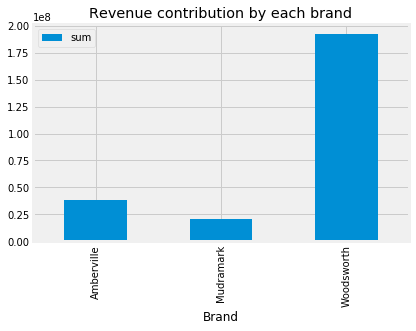

In [105]:

#PLotof revenue of each brand 
import matplotlib.pyplot as plt
df_brandwise=A_class.groupby('Brand').agg(['sum']).reset_index()
df_brandwise.plot(x='Brand', y='Total Revenue',kind="bar", title="Revenue contribution by each brand")
plt.show()
#

In [27]:
pd.pivot_table(A_class, index=['Brand'], values='Total Revenue', aggfunc='sum')

,Total Revenue
Brand,
Amberville,38032363
Mudramark,21079347
Woodsworth,192122696


In [36]:
# Stores performance in the A Class Slab based on revenue generated
pd.pivot_table(A_class, index=['Upstream Contact'], values='Total Revenue', aggfunc='sum').sort_values('Total Revenue',ascending =False)

,Total Revenue
Upstream Contact,
HOME SENSE INTERNATIONAL,48224320
GANGADHAR RATANLAL FURNITURE SHOWROOM,30349706
SHRI HARI IRON UDHYOG,28023521
Appu Art & Handicrafts,26558040
Vintej Home,22494753
Shree Sai Art Palace,16866555
Manglam,12071682
Shree Sai Industries,11575320
Vishwakarma Art Palace,9383938


In [ ]:
pd.pivot_table(A_class, index=['Upstream Contact'], values='Total Revenue', aggfunc='sum').sort_values('Total Revenue',ascending =False)

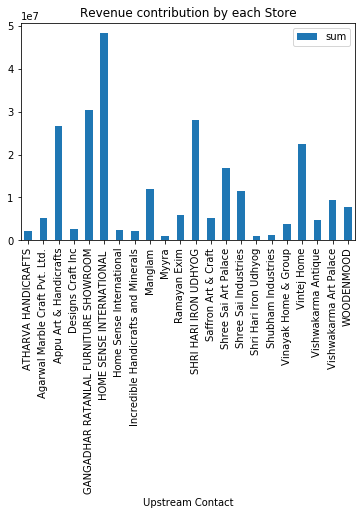

In [42]:
#PLot the revenue of each brand 
import matplotlib.pyplot as plt
df_store=A_class.groupby('Upstream Contact').agg(['sum']).reset_index()
df_store.plot(x='Upstream Contact', y='Total Revenue',kind="bar", title="Revenue contribution by each Store")
plt.show()
#

In [183]:
Quantity_Aclass = pd.merge(sale_df, A_class, left_on='New SKU', right_on='New SKU', how='right')
Quantity_Aclass["Sold_Qty"]= Quantity_Aclass.iloc[:,5:57].sum(axis=1)
Quantity_Aclass
#Quantity_Aclass.to_csv(r'E:/PepperFry/A_Sales.csv', index = False)

In [ ]:
Quantity_Aclass.columns

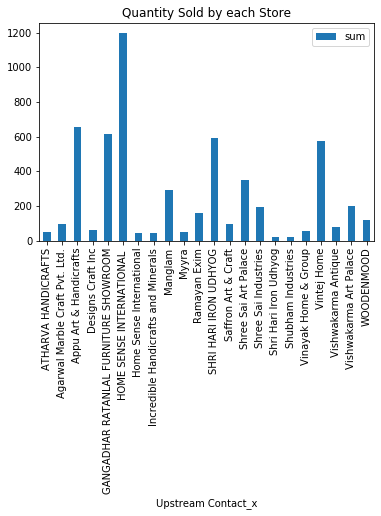

In [60]:
#PLot the revenue of each brand 
import matplotlib.pyplot as plt
df_storeOnQty=Quantity_Aclass.groupby('Upstream Contact_x').agg(['sum']).reset_index()
df_storeOnQty.plot(x='Upstream Contact_x', y='Sold_Qty',kind="bar", title="Quantity Sold by each Store")
plt.show()
#

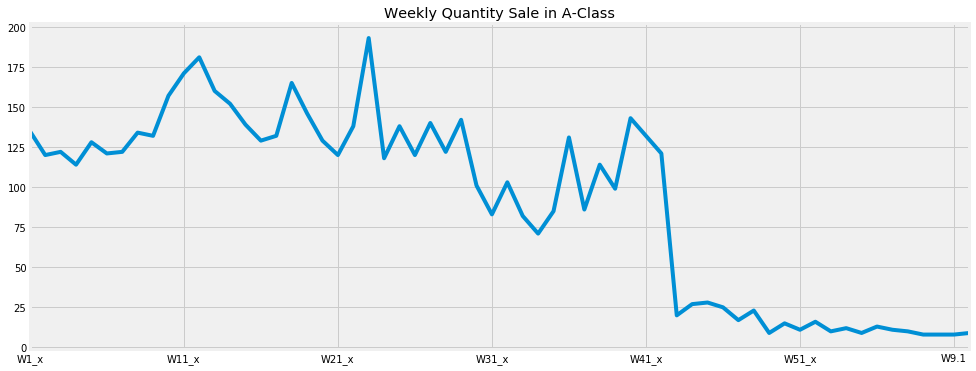

In [125]:
Total = Quantity_Aclass.iloc[:,5:67].sum()
Total
Total.plot(x='Week', y='Sold_Qty', title="Weekly Quantity Sale in A-Class",figsize=(15, 6))
plt.show()

In [78]:
rolling_mean = Total.rolling(window=3).mean()
print(rolling_mean.shape)
rolling_mean

(62,)


W1_x            NaN
W2_x            NaN
W3_x     125.666667
W4_x     118.666667
W5_x     121.333333
            ...    
W6.1      11.333333
W7.1       9.666667
W8.1       8.666667
W9.1       8.000000
W10.1      8.333333
Length: 62, dtype: float64

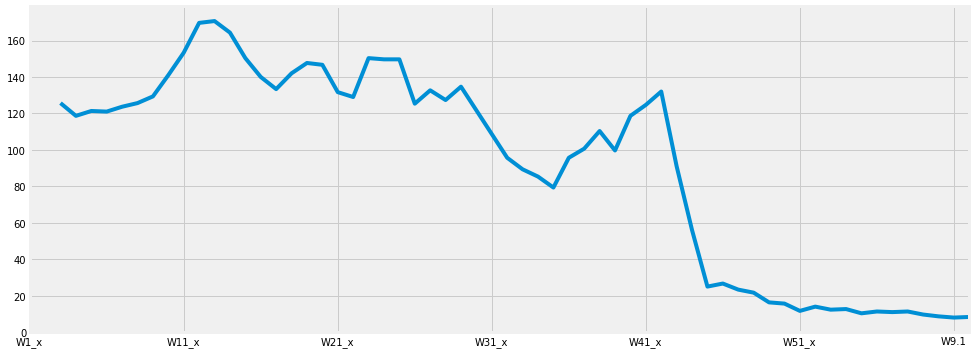

In [127]:

rolling_mean.plot(figsize=(15, 6))
plt.show()

# FORECASTING of Class A    SKU's

In [135]:
def smape(y_pred, y_true):
    # calculate error
    denom = (abs(y_pred) + abs(y_true)) / 2
    errors = abs(y_pred - y_true) / denom
    return 100 * np.sum(errors) / len(y_true)

In [157]:
train= pd.DataFrame()
test= pd.DataFrame()
def serie_split(s):
    """
    We split our datasets: based on 52 weeks sales data for training and rest 10 weeks is used for validation.
    As our goal is to predict the next 60 days of 2020, we use only the first 10 weeks of 2020 for validation.
    """
    i=0
    for i in range (len(s)):
        train[i] = s.iloc[i,1:53]
        test[i] = s.iloc[i,53:]
    
    return train, test

In [155]:
#Transpose the Data
Sale_Aclass =pd.merge(sale_df, A_class['New SKU'], left_on='New SKU', right_on='New SKU', how='right')
Sale_Aclass= Sale_Aclass[['New SKU','W1', 'W2',
       'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13',
       'W14', 'W15', 'W16', 'W17', 'W18', 'W19', 'W20', 'W21', 'W22', 'W23',
       'W24', 'W25', 'W26', 'W27', 'W28', 'W29', 'W30', 'W31', 'W32', 'W33',
       'W34', 'W35', 'W36', 'W37', 'W38', 'W39', 'W40', 'W41', 'W42', 'W43',
       'W44', 'W45', 'W46', 'W47', 'W48', 'W49', 'W50', 'W51', 'W52', 'W1.1',
       'W2.1', 'W3.1', 'W4.1', 'W5.1', 'W6.1', 'W7.1', 'W8.1', 'W9.1',
       'W10.1']]
Sale_Aclass
f= Sale_Aclass

In [158]:
serie_split(f)

(    0   1   2   3   4   5    ... 137 138 139 140 141 142
 W1    0   0   0   1   0   0  ...   0   0   0   0   0   0
 W2    2   0   0   1   0   1  ...   0   0   0   0   0   0
 W3    0   0   0   0   0   2  ...   0   0   0   0   0   0
 W4    0   0   0   0   0   1  ...   0   0   0   0   0   0
 W5    0   0   0   0   1   2  ...   0   3   0   1   0   2
 ..   ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..
 W48   0   0   0   1   0   0  ...   0   0   0   0   0   0
 W49   0   0   0   1   0   0  ...   1   0   0   0   0   0
 W50   0   0   0   0   0   0  ...   1   0   0   0   0   0
 W51   0   0   0   0   0   0  ...   0   0   0   0   0   0
 W52   0   0   0   1   0   0  ...   2   0   0   1   0   0
 
 [52 rows x 143 columns],
       0   1   2   3   4   5    ... 137 138 139 140 141 142
 W1.1    0   0   0   0   0   0  ...   1   0   0   0   0   0
 W2.1    0   0   0   0   0   0  ...   0   0   0   1   0   0
 W3.1    0   0   0   0   0   0  ...   2   0   0   0   0   0
 W4.1    0   0   0   0   0   0  ... 

In [181]:

def train_and_predict(model, serie):
    #r = rolling(window=4)

    train, test = serie_split(serie)
    train_X, train_y = train.rolling(window=4).mean()

    model.fit(train_X, train_y)

    y = predict(model.predict, train)

    return y, test

In [164]:
sales= pd.DataFrame()
j=0
def run_all_storeitems(model):
    errors = []
    
    for j in range(len(f)):
            sales[j] = f.iloc[j,:]
            predicted, real = train_and_predict(model, sales[j])
            error = smape(predicted, real)
            print(error)
            errors.append(error)
    return errors

In [ ]:
errors = run_all_storeitems(lm.LinearRegression())

# Month wise Analysis

In [129]:
monthly_sale = sale_df.iloc[:,0:5]
for i in annualsale_df:
    monthly_sale["M1"] = annualsale_df[['W1', 'W2', 'W3', 'W4','W5']].sum(axis=1)
    monthly_sale["M2"] = annualsale_df[['W6', 'W7', 'W8','W9']].sum(axis=1)
    monthly_sale["M3"] = annualsale_df[[ 'W10', 'W11','W12','W13']].sum(axis=1)
    monthly_sale["M4"] = annualsale_df[ ['W14', 'W15', 'W16','W17']].sum(axis=1)
    monthly_sale["M5"] = annualsale_df[['W18', 'W19', 'W20','W21', 'W22']].sum(axis=1)
    monthly_sale["M6"] = annualsale_df[['W23', 'W24','W25', 'W26']].sum(axis=1)
    monthly_sale["M7"] = annualsale_df[['W27', 'W28','W29', 'W30']].sum(axis=1)
    monthly_sale["M8"] = annualsale_df[['W31', 'W32','W33', 'W34', 'W35']].sum(axis=1)
    monthly_sale["M9"] = annualsale_df[['W36','W37', 'W38', 'W39']].sum(axis=1)
    monthly_sale["M10"] = annualsale_df[[ 'W40','W41','W42', 'W43', 'W44']].sum(axis=1)
    monthly_sale["M11"] = annualsale_df[['W45', 'W46', 'W47', 'W48']].sum(axis=1)
    monthly_sale["M12"] = annualsale_df[['W49', 'W50', 'W51','W52']].sum(axis=1)

monthly_sale

,New SKU,Brand,Upstream Contact,Type,Location,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
0,GN1063121-Z-WH2203,Woodsworth,Saffron Art & Craft,HB-SW,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0
1,GN1063121-Z-WH2305,Woodsworth,Suncity Handicrafts Pvt Ltd,HB-SW,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0
2,GN1576961-Z-WH19706,Mudramark,WOODENMOOD,HB-SW,Mumbai,2,1,0,3,4,14,0,0,5,4,0,0
3,GN1576961-Z-WH32492,Mudramark,Woodenmood,HB-SW,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0
4,GN7828171-Z-WH19566,Woodsworth,Incredible Handicrafts and Minerals,HB-SW,Mumbai,0,4,0,1,5,1,3,2,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,GN8347571-Z-WH32489,Woodsworth,Vishwakarma Art Palace,HB-SW,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0
2602,GN3377471-Z-WH32482,Woodsworth,Suncity Art Palace,HB-SW,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0
2603,GN1853121-Z-WH2202,Woodsworth,Hirani Handicrafts,HB-SW,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0
2604,GN1853121-Z-WH2203,Woodsworth,Saffron Art & Craft,HB-SW,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
XYZ_A = pd.merge(monthly_sale, A_class, left_on='New SKU', right_on='New SKU', how='right')
XYZ_A

,New SKU,Brand_x,Upstream Contact_x,Type_x,Location_x,M1,M2,M3,M4,M5,...,W47,W48,W49,W50,W51,W52,Total Revenue,RunCum,RunPercentage,Class
0,GN1576961-Z-WH19706,Mudramark,WOODENMOOD,HB-SW,Mumbai,2,1,0,3,4,...,0,0,0,0,0,0,2001842,109217893,0.260155,A
1,GN7828171-Z-WH19566,Woodsworth,Incredible Handicrafts and Minerals,HB-SW,Mumbai,0,4,0,1,5,...,0,0,0,0,0,0,1227810,198637186,0.473150,A
2,GN2605761-Z-WH21497,Amberville,GANGADHAR RATANLAL FURNITURE SHOWROOM,HB-SW,Mumbai,0,3,3,3,6,...,0,0,0,0,0,0,1198138,207103060,0.493316,A
3,GN3002061-Z-WH22879,Amberville,Designs Craft Inc,HB-SW,Mumbai,2,1,0,1,0,...,0,78124,68999,0,0,75999,1068691,231789475,0.552119,A
4,GN1527951-Z-WH15338,Woodsworth,Ramayan Exim,HB-SW,Mumbai,1,3,6,6,10,...,0,0,0,0,0,0,1163732,212991540,0.507342,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,GN6720861-Z-WH8952,Woodsworth,Shree Sai Industries,HB-SW,Mumbai,3,4,6,2,2,...,0,0,0,0,0,0,2125211,98948060,0.235693,A
139,GN3045261-Z-WH21497,Amberville,GANGADHAR RATANLAL FURNITURE SHOWROOM,HB-SW,Mumbai,0,5,4,3,3,...,0,0,0,0,0,0,1294118,191047232,0.455071,A
140,GN0147061-Z-WH17109,Woodsworth,Shubham Industries,HB-SW,Mumbai,1,0,0,3,4,...,0,0,0,0,0,62599,1294955,189753114,0.451989,A
141,GN8427951-Z-WH15338,Woodsworth,Ramayan Exim,HB-SW,Mumbai,0,1,6,3,4,...,0,0,0,0,0,0,1130602,217575330,0.518261,A


In [27]:
XYZ_A.columns

Index(['New SKU', 'Brand_x', 'Upstream Contact_x', 'Type_x', 'Location_x',
       'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11',
       'M12', 'Brand_y', 'Upstream Contact_y', 'Type_y', 'Location_y', 'W1',
       'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11', 'W12',
       'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'W19', 'W20', 'W21', 'W22',
       'W23', 'W24', 'W25', 'W26', 'W27', 'W28', 'W29', 'W30', 'W31', 'W32',
       'W33', 'W34', 'W35', 'W36', 'W37', 'W38', 'W39', 'W40', 'W41', 'W42',
       'W43', 'W44', 'W45', 'W46', 'W47', 'W48', 'W49', 'W50', 'W51', 'W52',
       'Total Revenue', 'RunCum', 'RunPercentage', 'Class'],
      dtype='object')

In [53]:
y =[]
month_columns = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11','M12']
y= np.std(XYZ_A[month_columns], axis=1)/np.mean(XYZ_A[month_columns],axis=1)
y.sort_values(ascending=False)

2242    3.316625
351     3.316625
378     3.316625
374     3.316625
1922    3.316625
          ...   
2249         NaN
2250         NaN
2251         NaN
2252         NaN
2253         NaN
Length: 2254, dtype: float64

In [122]:
#A_class.to_csv (r'E:/PepperFry/A_class.csv', index = False, header=True)

# CLASS C Analysis

In [91]:
C_class.head(10)

,New SKU,Brand,Upstream Contact,Type,Location,W1,W2,W3,W4,W5,...,W47,W48,W49,W50,W51,W52,Total Revenue,RunCum,RunPercentage,Class
0,GN1063121-Z-WH2203,Woodsworth,Saffron Art & Craft,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,419818219,1.000000,C
1,GN1063121-Z-WH2305,Woodsworth,Suncity Handicrafts Pvt Ltd,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,419818219,1.000000,C
3,GN1576961-Z-WH32492,Mudramark,Woodenmood,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,419818219,1.000000,C
5,GN7828171-Z-WH32476,Woodsworth,Incredible Handicrafts and Minerals,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,419818219,1.000000,C
6,GN9415061-Z-WH4248,Amberville,Vishwakarma Antique,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,119995,413144473,0.984103,C
7,GN9415061-Z-WH10718,Amberville,Woodsmith Creations,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,243366,396207204,0.943759,C
8,GN9415061-Z-WH10868,Amberville,Vishwakarma Art Palace,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,419818219,1.000000,C
9,GN9415061-Z-WH32485,Amberville,Vishwakarma Antique,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,419818219,1.000000,C
10,GN2218871-Z-WH21497,Amberville,GANGADHAR RATANLAL FURNITURE SHOWROOM,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,419818219,1.000000,C
11,GN2218871-Z-WH32475,Amberville,Gangadhar Ratanlal Furniture Showroom,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,419818219,1.000000,C


In [89]:
Inv_df["Avg_Inv"] = Inv_df.iloc[:,6:].mean(axis=1)

In [96]:
#Select only Class C ....SKU's from Inventory dataset
Inv_C_class = pd.merge(Inv_df, C_class['New SKU'], left_on='New SKU', right_on='New SKU', how='inner').sort_values("Avg_Inv", ascending=False)
Inv_C_class.head(8)

,New SKU,Upstream Contact,Brand,Type,Location,Date,2019-02-07 00:00:00,2019-02-14 00:00:00,2019-02-21 00:00:00,2019-02-28 00:00:00,...,2020-01-16 00:00:00,2020-01-23 00:00:00,2020-01-30 00:00:00,2020-02-06 00:00:00,2020-02-13 00:00:00,2020-02-20 00:00:00,2020-02-27 00:00:00,2020-03-05 00:00:00,2020-03-12 00:00:00,Avg_Inv
1734,GN3430461-Z-WH32480,Shree Sai Art Palace,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,32,32,32,32,31,29,26,25,24,9.913793
5,GN9415061-Z-WH10718,Woodsmith Creations,Amberville,HB-SW,Mumbai,NaN,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7.931034
2160,GN4675771-Z-WH21248,HOME SENSE INTERNATIONAL,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,14,14,11,7,3,3,2,1,0,6.189655
351,GN1076661-Z-WH32491,Home Sense International,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,19,19,18,18,18,18,18,18,18,5.120690
2028,GN1592051-Z-WH19706,WOODENMOOD,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,2,1,1,1,1,1,1,1,1,4.482759
394,GN2045261-Z-WH32475,Gangadhar Ratanlal Furniture Showroom,Amberville,HB-SW,Mumbai,NaN,0,0,0,0,...,14,11,10,10,10,10,8,8,6,4.224138
153,GN0324471-Z-WH10868,Vishwakarma Art Palace,Amberville,HB-SW,Mumbai,NaN,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.068966
1564,GN8449071-Z-WH22879,Designs Craft Inc,Mudramark,HB-SW,Mumbai,NaN,0,0,0,0,...,5,5,5,5,3,5,5,3,3,3.965517


In [123]:
High_Inv_C_class = Inv_C_class[Inv_C_class["Avg_Inv"] > 1]
High_Inv_C_class
'''
CONCLUSION :
    This df contains the list of 127 SKU's which have been giving low revenue and high inventory is maintained for them.
    If there is high inventory in the last week , then DISCOUNTS should be given to sell these inventory as they are slow moving.
    Also inform the suppliers to maintain low inventory of these 127 beds.
    
    '''

,New SKU,Upstream Contact,Brand,Type,Location,Date,2019-02-07 00:00:00,2019-02-14 00:00:00,2019-02-21 00:00:00,2019-02-28 00:00:00,...,2020-01-16 00:00:00,2020-01-23 00:00:00,2020-01-30 00:00:00,2020-02-06 00:00:00,2020-02-13 00:00:00,2020-02-20 00:00:00,2020-02-27 00:00:00,2020-03-05 00:00:00,2020-03-12 00:00:00,Avg_Inv
1734,GN3430461-Z-WH32480,Shree Sai Art Palace,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,32,32,32,32,31,29,26,25,24,9.913793
5,GN9415061-Z-WH10718,Woodsmith Creations,Amberville,HB-SW,Mumbai,NaN,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7.931034
2160,GN4675771-Z-WH21248,HOME SENSE INTERNATIONAL,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,14,14,11,7,3,3,2,1,0,6.189655
351,GN1076661-Z-WH32491,Home Sense International,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,19,19,18,18,18,18,18,18,18,5.120690
2028,GN1592051-Z-WH19706,WOODENMOOD,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,2,1,1,1,1,1,1,1,1,4.482759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,GN9605761-Z-WH32475,Gangadhar Ratanlal Furniture Showroom,Amberville,HB-SW,Mumbai,NaN,0,0,0,0,...,0,0,0,10,10,10,10,10,10,1.034483
165,GN6378471-Z-WH31628,Indigo Art Exim,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,2,2,2,2,2,2,2,2,2,1.034483
1978,GN0919471-Z-WH32489,Vishwakarma Art Palace,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,0,0,0,10,10,10,10,10,10,1.034483
278,GN9004871-Z-WH32524,Intercraft & Associates,Mudramark,HB-SW,Mumbai,NaN,0,0,0,0,...,5,5,5,4,4,4,4,4,4,1.017241


In [107]:
#Brand wise analysis with high inventory in C Class
pd.pivot_table(High_Inv_C_class, index=['Brand'], values='Avg_Inv', aggfunc='sum')

,Avg_Inv
Brand,
Amberville,60.224138
Mudramark,22.120690
Woodsworth,170.793103


In [110]:
#Supplier wise analysis with high inventory in C Class
pd.pivot_table(High_Inv_C_class, index=['Upstream Contact'], values='Avg_Inv', aggfunc='sum').sort_values("Avg_Inv", ascending=False)

,Avg_Inv
Upstream Contact,
Shree Sai Art Palace,30.017241
Vishwakarma Art Palace,25.948276
Gangadhar Ratanlal Furniture Showroom,23.879310
Home Sense International,22.258621
HOME SENSE INTERNATIONAL,18.517241
Ramayan Exim,13.413793
Appu Art & Handicrafts,10.775862
Intercraft & Associates,10.551724
Designs Craft Inc,9.965517


In [ ]:
'''
CONCLUSION :
    This df contains the list of 127 SKU's which have been giving low revenue and high inventory is maintained for them.
    If there is high inventory in the last week , then DISCOUNTS should be given to sell these inventory as they are slow moving.
    Also inform the suppliers to maintain low inventory of these 127 beds.
    
    '''